# Practice with Filtering 1

Read in the file "College_Salary_Data.csv" and answer the following questions

In [8]:
#Read in the data
import pandas as pd

df = pd.read_csv("data/College_Salary_Data.csv", index_col = 0)
df.columns = df.columns.str.replace("-","_").str.replace(" ", "_")

df.head(3)
#df.shape

,School_Name,School_Type,Starting_Median_Salary,Mid_Career_Median_Salary,Mid_Career_10th_Percentile_Salary,Mid_Career_25th_Percentile_Salary,Mid_Career_75th_Percentile_Salary,Mid_Career_90th_Percentile_Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,Northeastern
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN,California
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN,California


How many school-dept pairs have a starting salary greater than 65K?

In [7]:
#Write you code here
df1 = df.loc[df.Starting_Median_Salary >65000,:]
df1.shape[0]

4

What is the median mid career 75th percentile salary of party schools in a Southern or Western region? 

In [17]:
#Write your code here
df.loc[(df.Region == "Southern") | (df.Region == "Western"), "Mid_Career_75th_Percentile_Salary"].median()

107000.0

What fraction of California schools have a starting median starting salary above 50K?

In [20]:
#Write your code here
df.loc[df.Starting_Median_Salary>50000,].shape[0]/df.shape[0]


0.1895910780669145

# Practice with Filtering 2 - Groupby

In this practice exercise, we will analyze a yelp dataset. Import pandas and numpy below and read in the data set "Yelp.csv. Then get rid of all rows with NaN.

In [24]:
#Write your code here
df = pd.read_csv("data/Yelp_Data.csv")
print(df.shape)
df = df.dropna()
print(df.shape)

(72742, 40)
(72739, 40)


In [25]:
df.head(5)

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,"1530 Hamilton Rd Bethel Park, PA 15234",40.354115,-80.014660,Cool Springs Golf Center,5,2.5,PA,business,...,0,0,0,0,0,0,0,9,1,0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,"301 South Hills Village Pittsburgh, PA 15241",40.357620,-80.059980,Verizon,5,2.5,PA,business,...,0,0,0,0,0,0,0,0,0,0


Find the average star rating for each state (You can ignore the number of reviews for each restaurant). Store the result df_1.

In [32]:
#Write you code here
df.groupby('state').agg({'stars': 'mean'})


,stars
state,
AL,3.500000
AR,5.000000
AZ,3.709510
BW,3.768531
CA,3.500000
EDH,3.807777
ELN,3.791667
FIF,3.700000
HAM,4.500000


For each state compute the avg number of stars taking into account the number of reviews they got. First create a column called "total_stars", which is stars*review.  Then use groupby to compute the sum of total_stars as well as the sum of the number of reviews for each state and store the result in df_2. After this groupby remove all states that have fewer than 100 reviews. Then use this df to create column that is the average star rating.

In [39]:
#Write you code here
df['total_stars'] = df['stars'] * df['review_count']
df_2 = df.groupby('state').agg({'total_stars': 'sum', 'review_count': 'sum'}).reset_index()
df_2

df_3 = df_2[df_2['review_count'] >= 100]
df_3['average_stars'] = df_3['total_stars'] / df_3['review_count']
df_3

/var/folders/_t/dhv7mj6j62z8xtp4nxyz46kc0000gn/T/ipykernel_7240/1105055269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['average_stars'] = df_3['total_stars'] / df_3['review_count']


,state,total_stars,review_count,average_stars
2,AZ,3415460.5,905891,3.770278
3,BW,31424.0,8408,3.737393
4,CA,427.5,126,3.392857
5,EDH,151256.0,39082,3.870222
9,IL,63702.5,17273,3.687981
12,MLN,5079.5,1283,3.959080
14,NC,531745.0,144071,3.690854
17,NV,3904524.0,1047481,3.727537
19,ON,18858.0,5191,3.632826
21,PA,373508.5,99219,3.764486


Answer the same question as the previous question but use apply + grouply  + lambda function. Here don't worry about filtering for states with fewer than 100 reviews.

In [42]:
#Write your code here
df_4 = df.groupby('state').apply(lambda x: pd.Series({'sum_total_stars': x['total_stars'].sum(),'sum_reviews': x['review_count'].sum(),'average_stars': x['total_stars'].sum() / x['review_count'].sum()})).reset_index()
df_4

,state,sum_total_stars,sum_reviews,average_stars
0,AL,14.0,4.0,3.500000
1,AR,115.0,23.0,5.000000
2,AZ,3415460.5,905891.0,3.770278
3,BW,31424.0,8408.0,3.737393
4,CA,427.5,126.0,3.392857
5,EDH,151256.0,39082.0,3.870222
6,ELN,222.0,59.0,3.762712
7,FIF,139.5,39.0,3.576923
8,HAM,13.5,3.0,4.500000
9,IL,63702.5,17273.0,3.687981


Find the most popular zip code for restaurants rated in AZ and NV.  

In [50]:
#Write your code here
df['zip_code'] = df['full_address'].str[-5:]
df5 = df['zip_code'].value_counts()
df5.idxmax()

'89109'

# Practice with Merges

Run the cells below to create the following dataframes.

df_purchases contains information on various customer purchases.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

names = ["Jake", "Joe", "Ellen", "Joe", "Ellen"]
item = ["Ball", "Shirt", "Shoes", "Ball", "Shirt"]

df_purchases = pd.DataFrame({"Name": names, "Item_Purchased": item} )
                    
df_purchases

,Name,Item_Purchased
0,Jake,Ball
1,Joe,Shirt
2,Ellen,Shoes
3,Joe,Ball
4,Ellen,Shirt


df_items contains information on the prices of each item.

In [53]:
item = ["Ball", "Shirt", "Shoes"]
price = [10,15,75]

df_items = pd.DataFrame({"Item": item, "Price":price})

df_items

,Item,Price
0,Ball,10
1,Shirt,15
2,Shoes,75


df_customer contained information on the customers.

In [54]:
customers = ["Jake", "Joe", "Ellen"]
allowance = [15, 12, 85]

df_customers = pd.DataFrame({"Allowance":allowance, "Customers":customers})

df_customers

,Allowance,Customers
0,15,Jake
1,12,Joe
2,85,Ellen


### Question: How many customers went over their allowance?

Create df_1, which is df_purchases with an additional column that gives the price of each item

In [59]:
#Write your code here
df_1 = pd.merge(df_purchases, df_items, left_on='Item_Purchased', right_on='Item')
df_1.drop('Item', axis=1, inplace=True)
df_1

,Name,Item_Purchased,Price
0,Jake,Ball,10
1,Joe,Ball,10
2,Joe,Shirt,15
3,Ellen,Shirt,15
4,Ellen,Shoes,75


Create df_2, which stores the total amount that each person spent.

In [63]:
#Write your code here
df_2 =  df_1.groupby("Name").agg({"Price":"sum"})
df_2

,Price
Name,
Ellen,90
Jake,10
Joe,25


Created df_3, which adds each person't allowance to df_2

In [65]:
#Write your code here
df_3 = pd.merge(df_2, df_customers, left_index=True, right_on='Customers').reset_index()
df_3

,index,Price,Allowance,Customers
0,2,90,85,Ellen
1,0,10,15,Jake
2,1,25,12,Joe


Add a column to df_3 which tells whether or not they went over their allowance or not.

In [76]:
#Werite your code here
df_3["left"] = df_3.Price - df_3.Allowance
df_3["left_or_not"] = df_3["left"] < 0
df_3

,index,Price,Allowance,Customers,left,left_or_not
0,2,90,85,Ellen,5,False
1,0,10,15,Jake,-5,True
2,1,25,12,Joe,13,False


Compute how many people went over.

In [79]:
#Write your code here
df_3[df_3.left>0].shape[0]

2

# Running Back Analysis Tool

The goal in this practice is to analyze the number of rushing yards gained by an inputted running back over the various weeks that the data contains. We also would like to incorporate whether the given running back went up against good defenses. To do so, we will compute the average rushing yards given up by each of the given running back's opponents throughout the weeks.

In [ ]:
#Imports necessary Python libraries here
import pandas as pd
import matplotlib.pyplot as plt

Read in the data from the following 4 csv files: nflgames.csv, nflteams.csv, nflplayers.csv, rushingstats.csv. Filter the rushing stats so it only corresponds to running backs (PositionID = 2)

In [80]:
#read in the data below
games = pd.read_csv("data/football_data/nflgames.csv")
teams = pd.read_csv("data/football_data/nflteams.csv")
nflPlayers = pd.read_csv("data/football_data/nflplayers.csv")
rushingStats=pd.read_csv("data/football_data/rushingstats.csv")

rushingStats = rushingStats.loc[rushingStats["PositionID"] == 2, :]

teams.head()
rushingStats

,RushingStatsID,PlayerID,PositionID,TeamID,GameID,Att,Yds,Lng,TD,RunShort,RunFive,RunFifteen,RunThirtyPlus,RZInsideTwenty,RZInsideTen,RZInsideFive,RZTD,RZTotal
10,11,7,2,1,1,11,70,13,1,5,7,0,0,1,0,0,1,1
11,12,7,2,1,2,8,56,41,0,6,1,0,1,0,0,2,0,2
12,13,7,2,1,3,11,63,22,0,5,4,2,0,2,0,0,0,2
13,14,7,2,1,4,14,66,21,1,9,4,0,0,3,0,0,1,3
14,15,7,2,1,5,6,42,29,1,4,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1438,603,2,32,184,1,2,2,0,1,0,0,0,0,0,0,0,0
1438,1439,603,2,32,192,3,16,6,0,0,3,0,0,0,0,0,0,0
1453,1454,607,2,32,157,1,2,2,0,1,0,0,0,0,0,0,0,0
1454,1455,607,2,32,161,5,16,4,0,5,0,0,0,0,1,0,0,1


Enter the name of the running back you would like to analyze and then find the player's player ID and Team ID.

In [89]:
#Write your code here
name = "LeVeon Bell"
player_info = nflPlayers.loc[nflPlayers['PlayerName'] == name, ['PlayerID', 'TeamID']]
player_info

,PlayerID,TeamID
520,521,28


Next select the rushing stats corresponding to this player and merge this df with the games df to find the week. In this merged df select the following columns: TeamID, GameID, Yds, Week, HomeTeamID, AwayTeamID. Sort the resulting df by Week.

In [99]:
#Write your code here
player_rushing_stats = rushingStats[(rushingStats['PlayerID'] == 521)&(rushingStats['TeamID'] == 28)]
merged_df = pd.merge(player_rushing_stats, games, on='GameID')
final_df = merged_df[['TeamID', 'GameID', 'Yds', 'Week', 'HomeTeamID', 'AwayTeamID']]
final_df_sorted = final_df.sort_values(by='Week').reset_index()
final_df_sorted

,index,TeamID,GameID,Yds,Week,HomeTeamID,AwayTeamID
0,10,28,186,109,1,28,27
1,0,28,2,59,2,1,28
2,6,28,124,147,3,15,28
3,7,28,146,63,4,28,19
4,2,28,62,82,5,6,28
5,11,28,187,82,6,27,28
6,5,28,114,57,7,28,13
7,3,28,72,92,8,28,7
8,1,28,9,20,9,28,1
9,9,28,185,36,10,26,28


Create a line chart showing the rushing yards per game for this player.

Text(0, 0.5, 'Rushing Yards')

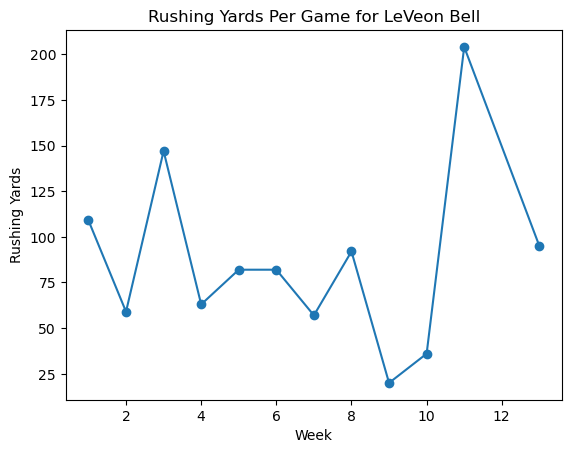

In [102]:
#Write your code here
final_df_sorted = final_df_sorted.sort_values(by='Week')
plt.plot(final_df_sorted['Week'], final_df_sorted['Yds'], marker='o') 
plt.title(f'Rushing Yards per Game for {name}')
plt.xlabel('Week')
plt.ylabel('Rushing Yards')

# Practice with Lambda Functions

Cconvert the following simple functions to lambda functions.

In [12]:
def Get_First_Letter(name):
    """Take a name as input return the lowercase of the first letter if the name's first letter is J, otherwise return the
    last letter of the name"""
    if name[0] == "J":
        first_letter = name[0].lower()
        return first_letter
    else:
        last_letter = name[-1]
        return last_letter
    

print(Get_First_Letter("Steve"))
print(Get_First_Letter("James"))

e
j


In [83]:
#Define your lambda function here
Get_First_Letter = lambda name: name[0].lower() if name[0] == "J" else name[-1]


In [84]:
def Check_Even(x):
    """Return True if x is even and odd otherwise """
    
    return x%2 == 0

print(Check_Even(5))
print(Check_Even(10))

False
True


In [85]:
#Define your lambda function here
Check_Even = lambda x: x%2 ==0

In [86]:
def Get_Num(L):
    """Return the integer version of the number
    specified by the list if strings in L"""
    
    return int("".join(L))

Get_Num(["1","5","2"])

152

In [87]:
#Define your lambda function here
Get_Num = lambda L: int("".join(L))